In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup  

In [27]:
URL = """https://www.baseball-reference.com/leagues/majors/2024-schedule.shtml"""



#URL = """
#https://results.baa.org/2023/?page=1&event=R&event_main_group=runner
#&num_results=1000&pid=list&pidp=start&search%5Bsex%5D=M&search%5Bage_class%5D=%25

#"""

r = requests.get(URL) 
  
soup = BeautifulSoup(r.content, 'html.parser') # If this line causes an error, run 'pip install html5lib' or install html5lib 
#print(soup)
days_list = soup.find_all('div',class_="section_content")[0]
days = days_list.find_all('div')
print(len(days_list))
print(len(days))

final_dicts = []

for x in range(len(days)) :
    date_ = days[x].find_all('h3')[0].get_text()
    games = days[x].find_all('p')
    for game in games :
        teams = game.find_all('a')
        time = game.find_all('strong')[0].get_text()
        away_team = teams[0].get_text()
        home_team = teams[1].get_text()
        #print(away_team, home_team)
        final_dicts.append({'date':date_,'time':time,'away team':away_team,'home team':home_team})
df = pd.DataFrame(final_dicts)
df

433
216


,date,time,away team,home team
0,"Thursday, February 22, 2024",3:10 pm,Los Angeles Dodgers,San Diego Padres
1,"Friday, February 23, 2024",3:05 pm,Chicago White Sox,Chicago Cubs
2,"Friday, February 23, 2024",3:05 pm,San Diego Padres,Los Angeles Dodgers
3,"Friday, February 23, 2024",3:05 pm,Kansas City Royals,Texas Rangers
4,"Friday, February 23, 2024",3:10 pm,Arizona D'Backs,Colorado Rockies
...,...,...,...,...
2897,"Sunday, September 29, 2024",3:10 pm,New York Mets,Milwaukee Brewers
2898,"Sunday, September 29, 2024",3:10 pm,Baltimore Orioles,Minnesota Twins
2899,"Sunday, September 29, 2024",3:10 pm,Oakland Athletics,Seattle Mariners
2900,"Sunday, September 29, 2024",3:20 pm,Kansas City Royals,Atlanta Braves


In [36]:
print(df['away team'].unique())

['Los Angeles Dodgers' 'Chicago White Sox' 'San Diego Padres'
 'Kansas City Royals' "Arizona D'Backs" 'Boston Red Sox'
 'New York Yankees' 'Pittsburgh Pirates' 'Miami Marlins' 'Atlanta Braves'
 'Philadelphia Phillies' 'St. Louis Cardinals' 'Seattle Mariners'
 'Cincinnati Reds' 'Texas Rangers' 'Colorado Rockies' 'Chicago Cubs'
 'Milwaukee Brewers' 'Houston Astros' 'Detroit Tigers' 'Minnesota Twins'
 'Baltimore Orioles' 'Toronto Blue Jays' 'Washington Nationals'
 'San Francisco Giants' 'Oakland Athletics' 'Los Angeles Angels'
 'Cleveland Guardians' 'Tampa Bay Rays' 'New York Mets']


In [28]:
df.to_csv('mlb_schedule.csv')

In [44]:
locations = pd.read_csv('mlb_locations.csv')
locations

,Venue,Team(s),Abbreviation,Latitude,Longitude
0,Chase Field,Arizona D'Backs,ARI,33.445278,-112.066944
1,Turner Field,Atlanta Braves,ATL,33.735278,-84.389444
2,Oriole Park at Camden Yards,Baltimore Orioles,BAL,39.283889,-76.621667
3,Fenway Park,Boston Red Sox,BOS,42.346389,-71.097500
4,Wrigley Field,Chicago Cubs,CHC,41.948333,-87.655556
5,U.S. Cellular Field,Chicago White Sox,CHW,41.830000,-87.633889
6,Great American Ball Park,Cincinnati Reds,CIN,39.097500,-84.506667
7,Progressive Field,Cleveland Guardians,CLE,41.495833,-81.685278
8,Coors Field,Colorado Rockies,COL,39.756111,-104.994167
9,Comerica Park,Detroit Tigers,DET,42.339167,-83.048611


In [62]:
def func_(s) :
    return s.split(',')[1:][0] + ', ' + s.split(',')[1:][1]

In [63]:
df_new = df.merge(locations, left_on='home team', right_on='Team(s)')
df_final = df_new[['date', 'time', 'away team', 'home team', 'Latitude', 'Longitude']]
df_final['date'] = df_final['date'].apply(func_)
df_final

/var/folders/zg/fhklgrzn3f9fp6svt46tyxfr0000gn/T/ipykernel_45276/2725662477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['date'] = df_final['date'].apply(func_)


,date,time,away team,home team,Latitude,Longitude
0,"February 22, 2024",3:10 pm,Los Angeles Dodgers,San Diego Padres,32.707300,-117.1566
1,"February 24, 2024",3:10 pm,Milwaukee Brewers,San Diego Padres,32.707300,-117.1566
2,"February 26, 2024",3:10 pm,Cleveland Guardians,San Diego Padres,32.707300,-117.1566
3,"February 27, 2024",3:10 pm,Kansas City Royals,San Diego Padres,32.707300,-117.1566
4,"March 1, 2024",3:10 pm,Los Angeles Angels,San Diego Padres,32.707300,-117.1566
...,...,...,...,...,...,...
2897,"September 18, 2024",9:40 pm,New York Yankees,Seattle Mariners,47.591389,-122.3325
2898,"September 19, 2024",4:10 pm,New York Yankees,Seattle Mariners,47.591389,-122.3325
2899,"September 27, 2024",10:10 pm,Oakland Athletics,Seattle Mariners,47.591389,-122.3325
2900,"September 28, 2024",9:40 pm,Oakland Athletics,Seattle Mariners,47.591389,-122.3325


In [65]:
df_final.to_csv('final_mlb_schedule.csv',index=False)

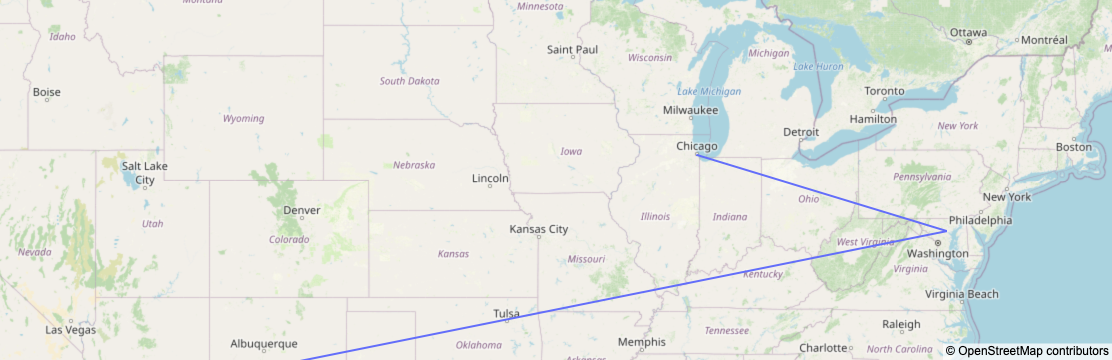

In [73]:

import plotly.express as px

fig = px.line_mapbox(df_final.iloc[[1,500,1190]], lat="Latitude", lon="Longitude", zoom=3, height=300,
                     hover_data=['away team','home team'])

fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=4, mapbox_center_lat = 41,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [77]:
df_ex = df_final.iloc[[1,500,1190]]
df_ex = df_ex.reset_index(drop=True)
df_ex['point_order'] = df_ex.index +1
df_ex

,date,time,away team,home team,Latitude,Longitude,point_order
0,"February 24, 2024",3:10 pm,Milwaukee Brewers,San Diego Padres,32.707300,-117.156600,1
1,"March 28, 2024",3:05 pm,Los Angeles Angels,Baltimore Orioles,39.283889,-76.621667,2
2,"April 29, 2024",7:40 pm,Minnesota Twins,Chicago White Sox,41.830000,-87.633889,3


In [84]:
df_final['away team'].unique()

array(['Los Angeles Dodgers', 'Milwaukee Brewers', 'Cleveland Guardians',
       'Kansas City Royals', 'Los Angeles Angels', 'Seattle Mariners',
       'Chicago Cubs', 'Cincinnati Reds', 'San Francisco Giants',
       'Chicago White Sox', "Arizona D'Backs", 'Oakland Athletics',
       'St. Louis Cardinals', 'Toronto Blue Jays',
       'Philadelphia Phillies', 'Colorado Rockies', 'New York Yankees',
       'Miami Marlins', 'Washington Nationals', 'Atlanta Braves',
       'Pittsburgh Pirates', 'Minnesota Twins', 'New York Mets',
       'Detroit Tigers', 'Houston Astros', 'San Diego Padres',
       'Texas Rangers', 'Boston Red Sox', 'Tampa Bay Rays',
       'Baltimore Orioles'], dtype=object)

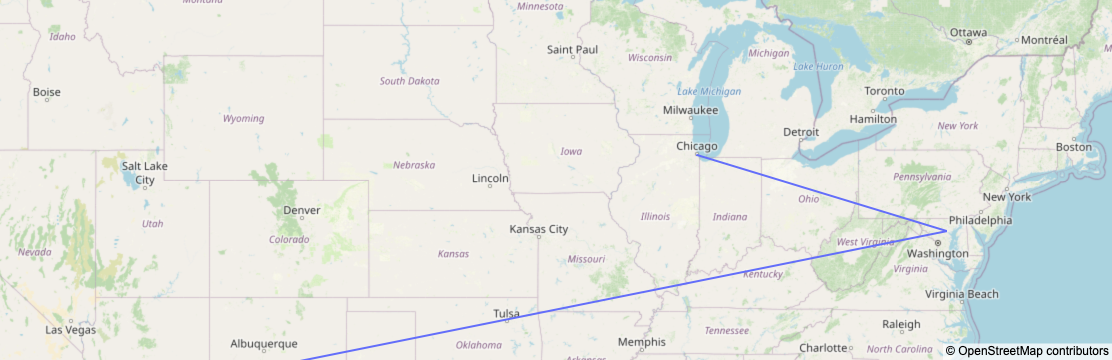

In [82]:
fig = px.line_mapbox(df_ex,lat="Latitude", lon="Longitude", 
                     #color='point_order',
                     zoom=3, height=300,
                     hover_data=['away team','home team'])

fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=4, mapbox_center_lat = 41,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [2]:
df_sample = pd.read_csv('final_mlb_schedule.csv')
df_sample

,date,time,away team,home team,Latitude,Longitude
0,"February 22, 2024",3:10 pm,Los Angeles Dodgers,San Diego Padres,32.707300,-117.1566
1,"February 24, 2024",3:10 pm,Milwaukee Brewers,San Diego Padres,32.707300,-117.1566
2,"February 26, 2024",3:10 pm,Cleveland Guardians,San Diego Padres,32.707300,-117.1566
3,"February 27, 2024",3:10 pm,Kansas City Royals,San Diego Padres,32.707300,-117.1566
4,"March 1, 2024",3:10 pm,Los Angeles Angels,San Diego Padres,32.707300,-117.1566
...,...,...,...,...,...,...
2897,"September 18, 2024",9:40 pm,New York Yankees,Seattle Mariners,47.591389,-122.3325
2898,"September 19, 2024",4:10 pm,New York Yankees,Seattle Mariners,47.591389,-122.3325
2899,"September 27, 2024",10:10 pm,Oakland Athletics,Seattle Mariners,47.591389,-122.3325
2900,"September 28, 2024",9:40 pm,Oakland Athletics,Seattle Mariners,47.591389,-122.3325


In [3]:
df_sample['home team'].unique().tolist()

['San Diego Padres',
 'Chicago Cubs',
 'Los Angeles Dodgers',
 'Texas Rangers',
 'Colorado Rockies',
 'Baltimore Orioles',
 'Detroit Tigers',
 'Minnesota Twins',
 'St. Louis Cardinals',
 'Tampa Bay Rays',
 'Toronto Blue Jays',
 'New York Mets',
 'Chicago White Sox',
 'Cleveland Guardians',
 'Kansas City Royals',
 'Oakland Athletics',
 'San Francisco Giants',
 'Los Angeles Angels',
 "Arizona D'Backs",
 'Washington Nationals',
 'Atlanta Braves',
 'Boston Red Sox',
 'Pittsburgh Pirates',
 'Philadelphia Phillies',
 'Houston Astros',
 'New York Yankees',
 'Miami Marlins',
 'Cincinnati Reds',
 'Milwaukee Brewers',
 'Seattle Mariners']

In [4]:
df_teams = pd.DataFrame()
df_teams['team'] = df_sample['home team'].unique().tolist()
df_teams

,team
0,San Diego Padres
1,Chicago Cubs
2,Los Angeles Dodgers
3,Texas Rangers
4,Colorado Rockies
5,Baltimore Orioles
6,Detroit Tigers
7,Minnesota Twins
8,St. Louis Cardinals
9,Tampa Bay Rays


In [5]:
df_teams['City'] = ['San Diego',
 'Chicago',
 'Los Angeles',
 'Arlington',
 'Denver',
 'Baltimore',
 'Detroit',
 'Minneapolis',
 'St. Louis',
 'Tampa Bay',
 'Toronto',
 'New York',
 'Chicago',
 'Cleveland',
 'Kansas City',
 'Oakland',
 'San Francisco',
 'Los Angeles',
 "Phoneix",
 'Washington D.C',
 'Atlanta',
 'Boston',
 'Pittsburgh',
 'Philadelphia',
 'Houston',
 'New York',
 'Miami',
 'Cincinnati',
 'Milwaukee',
 'Seattle']

In [7]:
df_teams['City'].tolist()

['San Diego',
 'Chicago',
 'Los Angeles',
 'Arlington',
 'Denver',
 'Baltimore',
 'Detroit',
 'Minneapolis',
 'St. Louis',
 'Tampa Bay',
 'Toronto',
 'New York',
 'Chicago',
 'Cleveland',
 'Kansas City',
 'Oakland',
 'San Francisco',
 'Los Angeles',
 'Phoneix',
 'Washington D.C',
 'Atlanta',
 'Boston',
 'Pittsburgh',
 'Philadelphia',
 'Houston',
 'New York',
 'Miami',
 'Cincinnati',
 'Milwaukee',
 'Seattle']